# PREGUNTA 1
Para responder la pregunta uno escogimos el [siguiente](https://www.kaggle.com/datasets/crawford/1000-cameras-dataset) dataset de [kaggle](https://www.kaggle.com) el cual trata sobre **cámaras** 📷 y cuenta con las siguientes columnas: 
- Model
- Release date
- Max resolution
- Low resolution
- Effective pixels
- Zoom wide (W)
- Zoom tele (T)
- Normal focus range
- Macro focus range
- Storage included
- Weight (inc. batteries)
- Dimensions
- Price

In [2]:
import csv
with open('camera_dataset.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar=',')
    for row in spamreader:
        print(', '.join(row))

Model,Release, date,Max, resolution,Low, resolution,Effective, pixels,Zoom, wide, (W),Zoom, tele, (T),Normal, focus, range,Macro, focus, range,Storage, included,Weight, (inc., batteries),Dimensions,Price
Agfa, ePhoto, 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
Agfa, ePhoto, 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
Agfa, ePhoto, CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
Agfa, ePhoto, CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
Agfa, ePhoto, CL30, Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
Agfa, ePhoto, CL45,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0
Agfa, ePhoto, CL50,1999,1280.0,640.0,1.0,34.0,102.0,0.0,0.0,8.0,0.0,0.0,179.0
Canon, PowerShot, 350,1997,640.0,0.0,0.0,42.0,42.0,70.0,3.0,2.0,320.0,93.0,149.0
Canon, PowerShot, 600,1996,832.0,640.0,0.0,50.0,50.0,40.0,10.0,1.0,460.0,160.0,139.0
Canon, PowerShot, A10,2001,1280.0,1024.0,1.0,35.0,105.0,76.0,

## 🐦Inciso A
### 🦉Con Python sin uso de librerías, calcule del ultimo cuartil, percentil 80 por columna; explique qué significa en cada caso.
El último cuartil se refiere al tercer cuartil (percentil al **75%**), para ello extraemos los **datos** de la culumna a analizar, los **ordenamos** de mayor a menor y sacamos la "**mediana al 75%**" (se sabe que el segundo cuartil es equivalente a la mediana, mas no a la media)

In [3]:
# Esta función extrae una columna en forma de lista
def columnToList(n):
    date=[]
    with open('camera_dataset.csv') as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        encabezado=str((next(readCSV))[n])  # Esto omitirá la primera fila que son los encabezados
        for row in readCSV:
            if(row[n]==''):
                row[n]=0
            date.append(float(row[n]))         
    date.sort(key = float)
    return date, encabezado
# Esta función extrae el nn-percentil de dd percentiles
# En el caso del ultimo cuartil, es el 3 percentil de 4 percentiles (75%)
# o el 80% percentil en caso del otro inciso
def ultimoCuartil(n,nn,dd):
    date, encabezado = columnToList(n)
    l=[]
    Q=nn*(len(date))/dd
    if(Q!=float(round(Q))):
        # Extrae los dos indices si es que fuera un numero racional
        n=int(Q)
        m=int(Q)+1
        l.append(n)
        l.append(m)
    else:
        n=int(Q)
    print("El "+str(nn)+"-percentil de "+str(dd)+" percentiles de '"+encabezado+"' es",end=" ")
    l2=[]
    for i in l:
        l2.append(date[i])
    nn=sum(l2)/len(l2)
    print(nn)
    # print("\tSiendo el minimo '"+str(date[0])+"' y el  maximo '"+str(date[-1])+"'")
    # return l

In [4]:
# Ahora, como son 13 columnas hacemos:
# Obviando la fila del nombre del modelo
print("EL ULTIMO CUARTIL DE CADA COLUMNA ES:")
for i in range(1,13):
    # En el caso del ultimo cuartil, es el 3 percentil de 4 percentiles (75%)
    ultimoCuartil(i,3,4)

EL ULTIMO CUARTIL DE CADA COLUMNA ES:
El 3-percentil de 4 percentiles de 'Release date' es 2006.0
El 3-percentil de 4 percentiles de 'Max resolution' es 3072.0
El 3-percentil de 4 percentiles de 'Low resolution' es 2560.0
El 3-percentil de 4 percentiles de 'Effective pixels' es 7.0
El 3-percentil de 4 percentiles de 'Zoom wide (W)' es 38.0
El 3-percentil de 4 percentiles de 'Zoom tele (T)' es 117.0
El 3-percentil de 4 percentiles de 'Normal focus range' es 60.0
El 3-percentil de 4 percentiles de 'Macro focus range' es 10.0
El 3-percentil de 4 percentiles de 'Storage included' es 20.0
El 3-percentil de 4 percentiles de 'Weight (inc. batteries)' es 350.0
El 3-percentil de 4 percentiles de 'Dimensions' es 115.0
El 3-percentil de 4 percentiles de 'Price' es 399.0


#### 🔎Explicación:
Lo que se hace al hallar el último cuartil de estos datos es tratar de hacer lo mismo que la mediana pero no al 50%, sino al 75%. Para lograr esto lo que hacemos ordenar los datos de cada columna de menor a mayor, luego dividmos estos datos en 4 (en este caso) y tomamos el indice de la tercera partición. Si los datos fueran de cardinalidad impar, el cuartil se halla solo extrayendo el elemento del indice al 75 ( *Indice=Q=(3/4)·Cantidad_de_elementos* ). Si la cardinalidad es par, se saca los dos elementos que esten a la derecha e izquiera del indice (que es racional) y se promedian.
Se podria interpretar estos resultados por cada columna como el valor de la variable situada en el límite de los 75 primeros.

In [5]:
# Ahora, como son 13 columnas hacemos:
# Obviando la fila del nombre del modelo
print("EL PERCENTIL AL 80% POR COLUMNA ES:")
for i in range(1,13):
    # En el caso del 80 percentil, es el 80 percentil de 100 percentiles
    ultimoCuartil(i,80,100)

EL PERCENTIL AL 80% POR COLUMNA ES:
El 80-percentil de 100 percentiles de 'Release date' es 2006.0
El 80-percentil de 100 percentiles de 'Max resolution' es 3072.0
El 80-percentil de 100 percentiles de 'Low resolution' es 2560.0
El 80-percentil de 100 percentiles de 'Effective pixels' es 7.0
El 80-percentil de 100 percentiles de 'Zoom wide (W)' es 38.0
El 80-percentil de 100 percentiles de 'Zoom tele (T)' es 130.0
El 80-percentil de 100 percentiles de 'Normal focus range' es 60.0
El 80-percentil de 100 percentiles de 'Macro focus range' es 10.0
El 80-percentil de 100 percentiles de 'Storage included' es 27.0
El 80-percentil de 100 percentiles de 'Weight (inc. batteries)' es 405.5
El 80-percentil de 100 percentiles de 'Dimensions' es 122.0
El 80-percentil de 100 percentiles de 'Price' es 429.0


#### 🔎Explicación:
Es basicamente el mismo procedimiento que el anterior ejercio, solo que ahora se hace correponder la mediana al 80% ( *Indice=Q=(80/100)·Cantidad_de_elementos* ) y se aplica el mismo razonamiento a los casos de cardinalidad par o impar.
Del mismo modo se podria interpretar estos resultados por cada columna como el valor de la variable situada en el límite de los 80 primeros.

## 🐦Inciso B
### 🦉Realice lo mismo del inciso (a) con el uso de numpy y pandas

In [6]:
import pandas as pd
import numpy as np

df = (pd.read_csv('camera_dataset.csv'))
print(df)

                       Model  Release date  Max resolution  Low resolution  \
0           Agfa ePhoto 1280          1997          1024.0           640.0   
1           Agfa ePhoto 1680          1998          1280.0           640.0   
2           Agfa ePhoto CL18          2000           640.0             0.0   
3           Agfa ePhoto CL30          1999          1152.0           640.0   
4     Agfa ePhoto CL30 Clik!          1999          1152.0           640.0   
...                      ...           ...             ...             ...   
1033         Toshiba PDR-M65          2001          2048.0          1024.0   
1034         Toshiba PDR-M70          2000          2048.0          1024.0   
1035         Toshiba PDR-M71          2001          2048.0          1024.0   
1036         Toshiba PDR-M81          2001          2400.0          1200.0   
1037         Toshiba PDR-T10          2002          1600.0           800.0   

      Effective pixels  Zoom wide (W)  Zoom tele (T)  Normal fo

In [7]:
print("EL ULTIMO CUARTIL DE CADA COLUMNA:")
columnas=["Release date","Max resolution","Low resolution","Effective pixels","Zoom wide (W)","Zoom tele (T)","Normal focus range","Macro focus range","Storage included","Weight (inc. batteries)","Dimensions","Price"]

for col in columnas:
    ultCuartil=(df[col].quantile(0.75))
    print(f"En la columna de '{col}' en último cuartil es de {ultCuartil}")
print()
for col in columnas:
    percentil80=(df[col].quantile(0.80))
    print(f"En la columna de '{col}' el percentil al 80% es de {percentil80}")



EL ULTIMO CUARTIL DE CADA COLUMNA:
En la columna de 'Release date' en último cuartil es de 2006.0
En la columna de 'Max resolution' en último cuartil es de 3072.0
En la columna de 'Low resolution' en último cuartil es de 2560.0
En la columna de 'Effective pixels' en último cuartil es de 7.0
En la columna de 'Zoom wide (W)' en último cuartil es de 38.0
En la columna de 'Zoom tele (T)' en último cuartil es de 117.0
En la columna de 'Normal focus range' en último cuartil es de 60.0
En la columna de 'Macro focus range' en último cuartil es de 10.0
En la columna de 'Storage included' en último cuartil es de 20.0
En la columna de 'Weight (inc. batteries)' en último cuartil es de 350.0
En la columna de 'Dimensions' en último cuartil es de 115.0
En la columna de 'Price' en último cuartil es de 399.0

En la columna de 'Release date' el percentil al 80% es de 2006.0
En la columna de 'Max resolution' el percentil al 80% es de 3072.0
En la columna de 'Low resolution' el percentil al 80% es de 2560

#### 🔎Explicación:
Vemos que con `pandas` este proceso es mucho más fácil. Lo único que hacemos es recorre una lista con los nombres de las columnas y que `pandas` halle el percentil en el valor que nosotros le asigenemos a travez de la función  `ultCuartil=(df[col].quantile(0.75))` la cual devuelve un flotante y recive como argumentos el **objeto pandas** donde se almaceno nuestro dataset, y le pasa el nombre de la **columna** como índice. A este le aplica el **método** `quantile(0.75)` que tiene como argumento a un float que indica sobre cuanto hay que dividir los datos, y a cual de ellos hay que hacer corresponder el percentil. 

## 🐦Inciso C
### 🦉Obtenga la media, mediana, moda y geométrica; explique la diferencia de los resultados y cuál de ellas se puede utilizar en un artículo científico.

In [10]:
columnas=["Release date","Max resolution","Low resolution","Effective pixels","Zoom wide (W)","Zoom tele (T)","Normal focus range","Macro focus range","Storage included","Weight (inc. batteries)","Dimensions","Price"]

for col in columnas:
    print(f'\n"{col}":')
    media = df[col].mean()
    mediana = df[col].median()
    moda = (df[col].mode())[0]
    media_geometrica = np.exp(np.log(df[col].replace(0, np.nan).dropna()).mean())
    print(f"""      Media: {media}
      Mediana: {mediana}
      Moda: {moda}
      Media geometrica: {media_geometrica}""")



"Release date":
      Media: 2003.5905587668594
      Mediana: 2004.0
      Moda: 2007
      Media geometrica: 2003.588706778115

"Max resolution":
      Media: 2474.6724470134873
      Mediana: 2560.0
      Moda: 3072.0
      Media geometrica: 2345.960900651432

"Low resolution":
      Media: 1773.936416184971
      Mediana: 2048.0
      Moda: 2048.0
      Media geometrica: 1691.7362565072497

"Effective pixels":
      Media: 4.596339113680155
      Mediana: 4.0
      Moda: 3.0
      Media geometrica: 3.8573447265251692

"Zoom wide (W)":
      Media: 32.96339113680154
      Mediana: 36.0
      Moda: 38.0
      Media geometrica: 35.747226196757964

"Zoom tele (T)":
      Media: 121.52504816955684
      Mediana: 108.0
      Moda: 114.0
      Media geometrica: 111.42253370430244

"Normal focus range":
      Media: 44.14547206165703
      Mediana: 50.0
      Moda: 50.0
      Media geometrica: 46.004620624234704

"Macro focus range":
      Media: 7.787849566055931
      Mediana: 6.0
     

#### 🔎Explicación:
#####  🤖Código:
Para este inciso usamos los métodos de pandas `.mean()` (**media**), `.median()` (**mediana**), y `.mode()` (**moda**). Como `.mode()` devulve una lista, y solo le estamos introduciendo una columna le agregamos `[0]` para que solo nos devuelva el valor y no una tabla. Por otro lado `pandas` no tiene un método para la **media geométrica**, así que usamos los métodos de `numpy`. Como nuestro datos contiene **0**'s y **vacios**, lo que hacemos es convertir los *0* en *Nan* ('Not a number') y con `.dropna()` eliminamos todos los *NaN*. De esa manera de elimina el error respecto a logaritmo de cero.
##### 🖋️Teórica
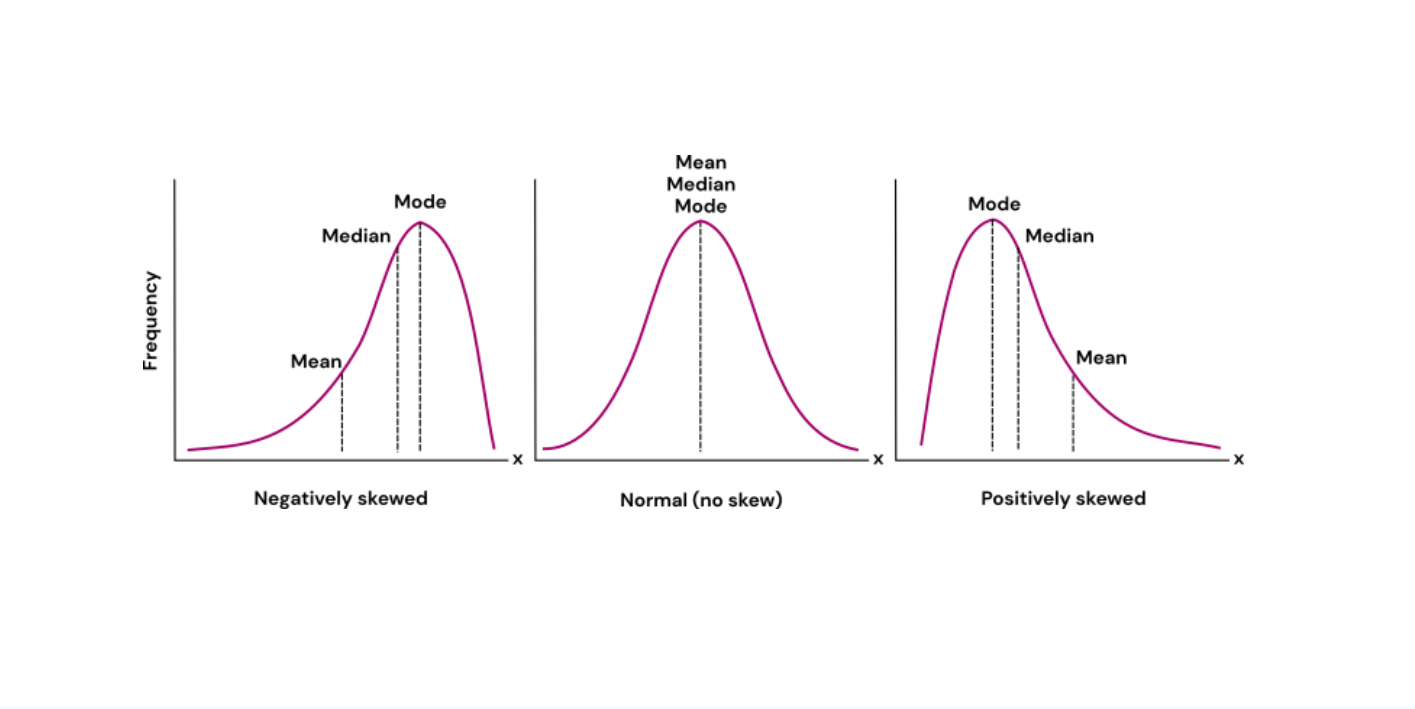
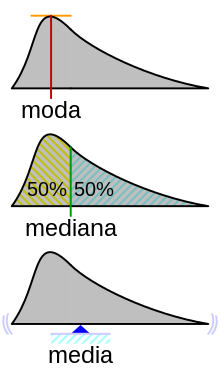

Se podria entonces interpretar los resultado como:
- **Moda**: El valor que más se repite, el valor más "popular".
- **Media**:  Es el valor promedio, el valor que se situa entre el valor más popular y el menos popular.
- **Mediana**: Es el valor central de la lista ordenada. Depende de cuantos datos hay, y no tanto así del valor de los mismos.
- **Media Geométrica** La media geométrica es como la media aritmética (o simplemente media), solo que se ve menos afectado por valores extremos o valores atípicos en comparación con esta.
> *Sin embargo, también existen limitaciones para usar la media geométrica como medida de tendencia central.Una limitación es que no se puede calcular para conjuntos de datos que contienen valores negativos o cero, ya que tomar el logaritmo (requerido para calcular la media geométrica) de números no positivos no está definido.Además, si hay valores faltantes en el conjunto de datos, la media geométrica no se puede calcular con precisión.Por ejemplo, si tenemos un conjunto de datos que representa las tasas de crecimiento de la población de diferentes países durante cinco años: 2%, 4%, 6%y un valor desconocido para el quinto año, no podemos calcular la media geométrica sin conocer el valor faltante.* [ Tendencia central media geometrica como medida de tendencia central](https://fastercapital.com/es/contenido/Tendencia-central--media-geometrica-como-medida-de-tendencia-central.html)

Asi pues, en nuestro caso **eliminamos** los **0**'s y **vacios** para hallar la media geométrica **aun esta no exista** solo con el fin de poder **aproximar** una idea de lo representa y cuanto podría llegar a valer.

## 🐦Inciso D
### 🦉Grafique los datos y explique su comportamiento (PYTHON)

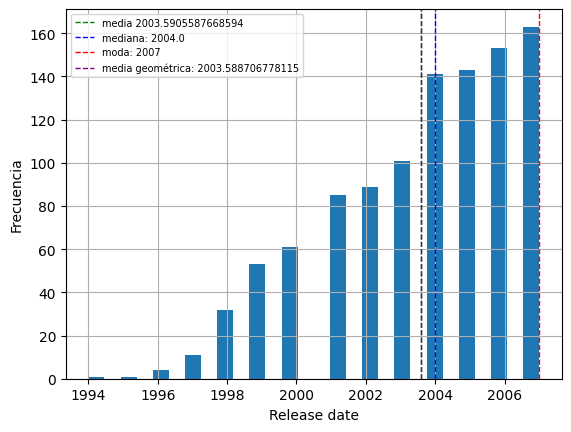

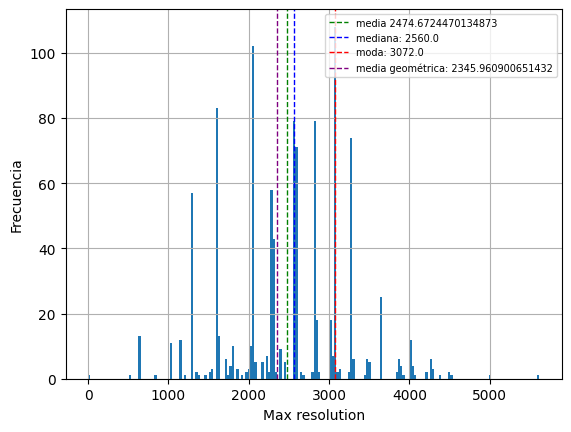

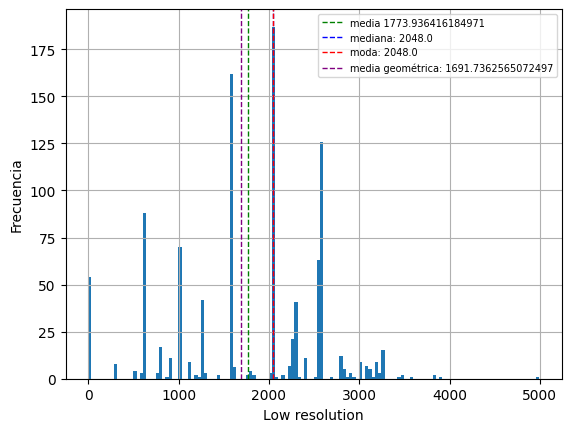

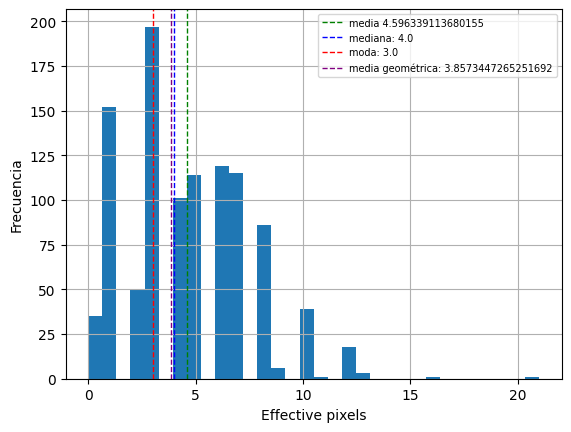

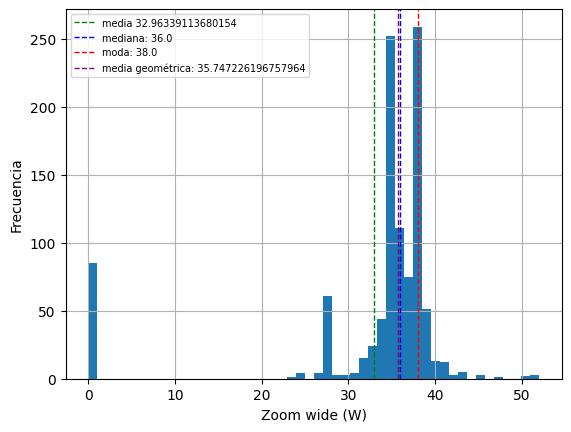

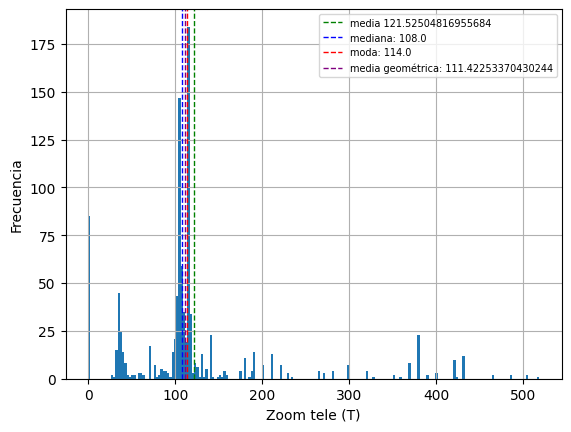

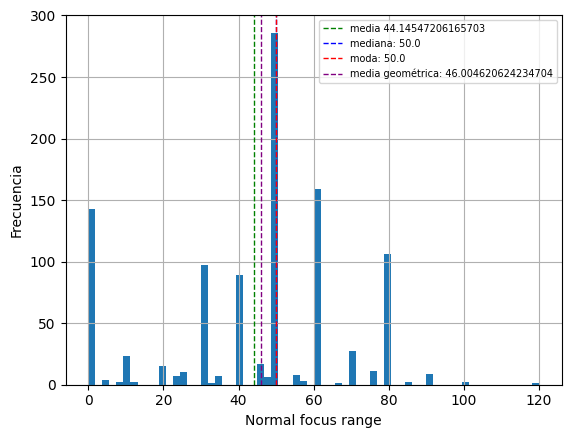

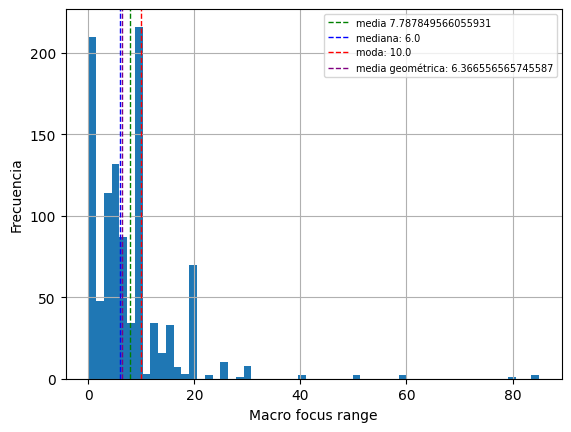

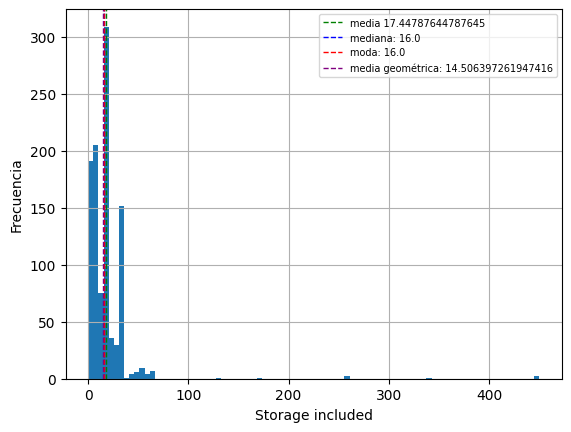

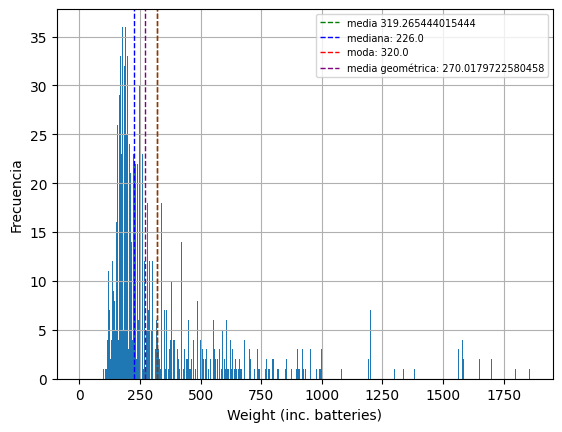

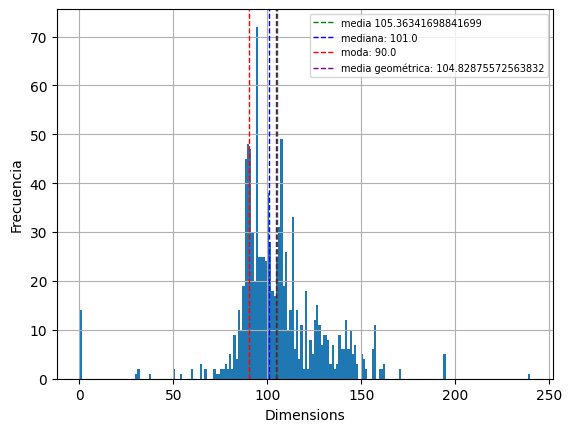

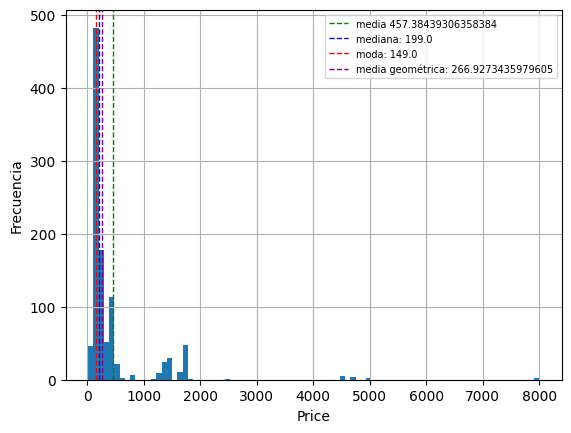

In [130]:
import matplotlib.pyplot as plt
for col in columnas:
    fig, ax = plt.subplots()

    media = df[col].mean()
    mediana = df[col].median()
    moda = (df[col].mode())[0]
    media_geometrica = np.exp(np.log(df[col].replace(0, np.nan).dropna()).mean())
    myLineWidth = 1
    myLineStyle = "dashed"
    media_plot=ax.axvline(media, color='green', linestyle=myLineStyle, linewidth=myLineWidth )
    mediana_plot=ax.axvline(mediana, color='blue', linestyle=myLineStyle, linewidth=myLineWidth)
    moda_plot=ax.axvline(moda, color='red', linestyle=myLineStyle, linewidth=myLineWidth)
    geometrica_plot=ax.axvline(media_geometrica, color='purple', linestyle=myLineStyle, linewidth=myLineWidth)
    media_plot.set_label(f'media {media}' )
    mediana_plot.set_label(f'mediana: {mediana}')
    moda_plot.set_label(f'moda: {moda}')
    geometrica_plot.set_label(f'media geométrica: {media_geometrica}')
    bins = df[col].nunique()*2
    plt.hist(df[col], bins=bins)
    plt.ylabel('Frecuencia')
    plt.xlabel(col)
    plt.grid(True)
    plt.legend(fontsize=7)
    plt.show()

#### 🔎Explicación:
- **Moda**: Vemos que señana al dato que se presenta con mayor frecuencia
- **Media**:  Simpre señala el valor promedio, la esperanza, el valor esperado.
- **Mediana**: Es el valor central de la lista ordenada. Depende de cuantos datos hay, y no tanto así del valor de los mismos.
En este caso, no siempre se situa en el medio como en la imagen de referencia. Esto es por que esta solo toma en cuenta los valores existentes, asi pues, si eliminaramos los espacios en blanco, esta si quedaria en el medio.

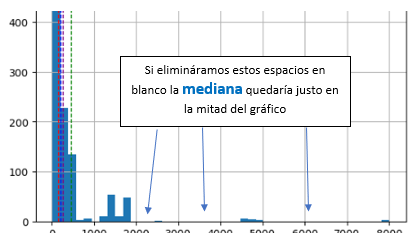

- **Media Geométrica** Similar a la media artimética (o simplemente media) solo que no es tan infuida por los valores mas altos. Esta se usa mas en el contexto de porcentajes, y como vimos atrás, podría no existir. Por lo tanto, capaz sacar muchas interpretaciones de las anteriores gráficas, ya que su aplicación es en un contexto diferente.